In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/motionsense-dataset/data_subjects_info.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/dws_1/._sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_4.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/jog_9/._sub_5.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/__MACOSX/A_DeviceMotion_data/wlk_7/._sub_13.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_16.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_18.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_3.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_12.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_1.csv
/kaggle/input/motionsense-dataset/A_DeviceMotion_data/A_DeviceMotion_data/dws_1/sub_4

In [2]:
import os
import numpy as np
import pandas as pd

# change these following three lines only
subject_data_file = 'data_subjects_info.csv'
data_dir = '/kaggle/input/motionsense-dataset/A_DeviceMotion_data'

os.chdir(data_dir)
os.chdir(os.pardir)

def get_all_dataset_paths(input_dir) -> []:
    input_files = []
    for dirs, subdirs, files in os.walk(input_dir):
        for file in files:
            if file.endswith('.csv'):
                input_files.append(os.path.join(dirs, file))
    return input_files

def load_whole_dataframe_from_paths(paths, meta) -> pd.DataFrame:
    
    df = pd.DataFrame()

    for p in paths:
        c_dir, c_file = p.split('/')[-2], p.split('/')[-1]
        c_cat, c_ses = c_dir.split('_')[-2], c_dir.split('_')[-1]
        c_sub = c_file.split('_')[-1].split('.')[-2]
        
        tdf = pd.read_csv(p, encoding = "utf-8")
        tdf = tdf.assign(subject_id = int(c_sub))
        tdf = tdf.assign(session_id = int(c_ses))
        tdf = tdf.assign(category = str(c_cat))
        tdf = tdf.assign(age = int(meta.age[int(c_sub) - 1]))
        tdf = tdf.assign(gender = int(meta.gender[int(c_sub) - 1]))
        tdf = tdf.assign(height = int(meta.height[int(c_sub) - 1]))
        tdf = tdf.assign(weight = int(meta.weight[int(c_sub) - 1]))

        df = pd.concat([df, tdf])
    
    df.reset_index(drop=True, inplace=True)
    return df

subject_data_frame = pd.DataFrame(pd.read_csv(subject_data_file, encoding = "utf-8"))
all_dataset_paths = get_all_dataset_paths(data_dir)
data_frame = load_whole_dataframe_from_paths(all_dataset_paths, subject_data_frame)


In [3]:
df = data_frame.copy() #making a copy of original dataframe
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('subject_id', axis=1, inplace=True)
df.drop('session_id', axis=1, inplace=True)
df.drop('age', axis=1, inplace=True)
df.drop('gender', axis=1, inplace=True)
df.drop('height', axis=1, inplace=True)
df.drop('weight', axis=1, inplace=True)
df

,category,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z
0,dws,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989
1,dws,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646
2,dws,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598
3,dws,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623
4,dws,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,wlk,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558
1412861,wlk,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729
1412862,wlk,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601
1412863,wlk,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192


In [4]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
labels = lEncoder.fit(df.category)
df['code'] = lEncoder.transform(df.category)
df.drop('category', axis=1, inplace=True)
df

,attitude.roll,attitude.pitch,attitude.yaw,gravity.x,gravity.y,gravity.z,rotationRate.x,rotationRate.y,rotationRate.z,userAcceleration.x,userAcceleration.y,userAcceleration.z,code
0,1.044129,-1.364544,-0.762006,0.177020,0.978805,-0.102928,-0.055552,0.296486,-0.517680,0.277799,0.073975,-0.005989,0
1,1.033699,-1.374970,-0.777007,0.167157,0.980887,-0.099540,-0.160723,0.148822,-0.528907,0.209674,-0.051886,0.032646,0
2,1.020201,-1.385414,-0.792103,0.157058,0.982866,-0.096422,-0.125106,0.032462,-0.498599,0.164369,-0.157625,0.108598,0
3,0.991317,-1.392669,-0.820281,0.148236,0.984177,-0.097010,0.135182,-0.113719,-0.398317,0.138705,-0.194550,0.106623,0
4,0.938219,-1.393323,-0.871891,0.142361,0.984293,-0.104360,0.475710,-0.107196,-0.194053,0.141697,-0.141046,0.052633,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1412860,-0.023793,-0.999631,-0.784959,-0.012861,0.841271,-0.540444,0.047839,-0.205053,-0.354167,0.114348,0.727546,0.388558,5
1412861,-0.043543,-1.004392,-0.804742,-0.023357,0.843836,-0.536076,-0.498880,0.069946,-0.452342,-0.366063,0.680807,0.583729,5
1412862,-0.040952,-1.016429,-0.808555,-0.021550,0.850234,-0.525946,-0.519771,0.242518,0.098493,-0.240245,0.207811,0.528601,5
1412863,-0.034956,-1.023650,-0.799503,-0.018182,0.854013,-0.519916,-0.363679,-0.225310,0.272167,-0.199577,-0.125375,0.559192,5


In [5]:
from sklearn.model_selection import train_test_split

x_columns = df.iloc[:, 0:12]
y_columns = df.iloc[:, 12:13]

trainx, testx, trainy, testy = train_test_split(x_columns, y_columns, test_size=0.2, shuffle=False)
assert(len(trainx) == len(trainy))

In [6]:
from scipy.stats import mode

WINDOW_LENGTH = 150
STRIDE_LENGTH = 10
NUM_CLASSES = 6
NUM_FEATURES = 12
BATCH_SIZE = 100
EPOCHS_SIZE = 10

def sequence_generator(x, y, length, stride):
    seq_x = []
    seq_y = []
    data_length = len(x)

    for i in range(0, data_length - length + 1, stride):
        input_sequence = x.iloc[i : i + length]
        target_sequence = y.iloc[i : i + length]
        target_mode = mode(target_sequence.values)[0][0]
        seq_x.append(input_sequence)
        seq_y.append(target_mode)
    return np.array(seq_x), np.array(seq_y)

tx, ty = sequence_generator(trainx, trainy, WINDOW_LENGTH, STRIDE_LENGTH)
vx, vy = sequence_generator(testx, testy, WINDOW_LENGTH, STRIDE_LENGTH)

In [7]:
from keras.utils import to_categorical


tty = to_categorical(ty, num_classes=NUM_CLASSES)
vvy = to_categorical(vy, num_classes=NUM_CLASSES)

In [13]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Concatenate, Dense, GlobalAveragePooling1D, Multiply, Layer

# Define 1D Spatial Attention Layer
class SpatialAttention(Layer):
    def __init__(self, kernel_size=5):
        super(SpatialAttention, self).__init__()
        self.kernel_size = kernel_size
        self.conv = Conv1D(filters=1, kernel_size=self.kernel_size, padding="same", activation="sigmoid")
    
    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=1, keepdims=True)
        concat = tf.concat([avg_pool, max_pool], axis=-1)
        conv_out = self.conv(concat)
        return Multiply()([inputs, conv_out])

# Define 1D Temporal Attention Layer
class TemporalAttention(Layer):
    def __init__(self, kernel_size=5):
        super(TemporalAttention, self).__init__()
        self.kernel_size = kernel_size
        self.conv = Conv1D(filters=1, kernel_size=self.kernel_size, padding="same", activation="sigmoid")
    
    def call(self, inputs):
        avg_pool = tf.reduce_mean(inputs, axis=-1, keepdims=True)
        max_pool = tf.reduce_max(inputs, axis=-1, keepdims=True)
        concat = tf.concat([avg_pool, max_pool], axis=-1)
        conv_out = self.conv(concat)
        return Multiply()([inputs, conv_out])

# Define the model with two parallel paths
def build_parallel_attention_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # Path 1: Spatial Attention Path
    spatial_path = Conv1D(filters=64, kernel_size=3, padding="same", activation="relu")(inputs)
    spatial_path = SpatialAttention(kernel_size=5)(spatial_path)
    
    # Path 2: Temporal Attention Path
    temporal_path = Conv1D(filters=64, kernel_size=3, padding="same", activation="relu")(inputs)
    temporal_path = TemporalAttention(kernel_size=5)(temporal_path)
    
    # Merge Paths
    merged = Concatenate()([spatial_path, temporal_path])
    merged = Conv1D(filters=128, kernel_size=3, padding="same", activation="relu")(merged)
    pooled = GlobalAveragePooling1D()(merged)
    outputs = Dense(6, activation="sigmoid")(pooled)
    
    # Build and compile model
    model = tf.keras.models.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    
    return model

# Define input shape and build model
input_shape = (150, 12)
model = build_parallel_attention_model(input_shape)
model.summary()


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 12)   │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 150, 64)   │      2,368 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_12 (Conv1D)  │ (None, 150, 64)   │      2,368 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_attention_2 │ (None, 150, 64)   │        641 │ conv1d_10[0][0]   │
│ (SpatialAttention)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ temporal_attention… │ (None, 150, 64)   │         11 │ conv1d_12[0][0]   │
│ (TemporalAttention) │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 150, 128)  │          0 │ spatial_attentio… │
│ (Concatenate)       │                   │            │ temporal_attenti… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_14 (Conv1D)  │ (None, 150, 128)  │     49,280 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 128)       │          0 │ conv1d_14[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 6)         │        774 │ global_average_p… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 55,442 (216.57 KB)

 Trainable params: 55,442 (216.57 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:

history = model.fit(tx, tty, epochs=EPOCHS_SIZE, batch_size=BATCH_SIZE,validation_data=(vx, vvy))

Epoch 1/10


I0000 00:00:1730206136.679673     112 service.cc:145] XLA service 0x7951d80be030 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730206136.679715     112 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730206136.679719     112 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  27/1131 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.3087 - loss: 0.5618

I0000 00:00:1730206139.514366     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1131/1131 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8441 - loss: 0.1409 - val_accuracy: 0.8702 - val_loss: 0.1428
Epoch 2/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9913 - loss: 0.0122 - val_accuracy: 0.8982 - val_loss: 0.1416
Epoch 3/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9947 - loss: 0.0075 - val_accuracy: 0.8886 - val_loss: 0.1857
Epoch 4/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9967 - loss: 0.0044 - val_accuracy: 0.9200 - val_loss: 0.1553
Epoch 5/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9968 - loss: 0.0043 - val_accuracy: 0.8731 - val_loss: 0.2377
Epoch 6/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9973 - loss: 0.0032 - val_accuracy: 0.8823 - val_loss: 0.2340
Epoch 7/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9986 - loss: 0.0021 - val_accuracy: 0.9269 - val_loss: 0.1898
Epoch 8/10
1131/1131 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.9989 - loss: 0.0017 - val_accur

In [15]:
model.evaluate(vx, vvy, batch_size=BATCH_SIZE)

283/283 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9322 - loss: 0.1968


[0.2577020823955536, 0.904011607170105]

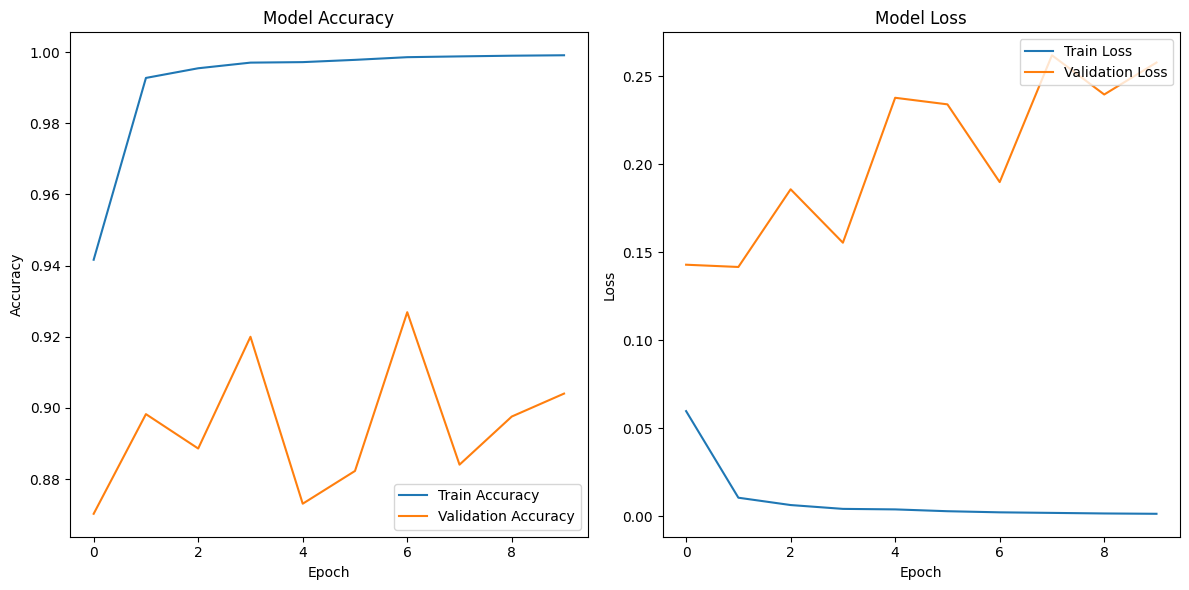

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

# Display the plots
plt.tight_layout()
plt.show()
